In [6]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings (1).csv


In [10]:
import io
import pandas as pd

# Assuming you're using 'listings.csv' only for this lab
df = pd.read_csv(io.BytesIO(uploaded['listings (1).csv']))

In [13]:
# Clean and preprocess
df = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].dropna()
df = df[df['price'] > 0]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# A1 & A2 – Using a single feature
model_single = LinearRegression().fit(X_train[['minimum_nights']], y_train)

y_train_pred = model_single.predict(X_train[['minimum_nights']])
y_test_pred = model_single.predict(X_test[['minimum_nights']])

print("Single Feature Metrics")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R2-score:", r2_score(y_train, y_train_pred))
print("Test R2-score:", r2_score(y_test, y_test_pred))
print("Train MAPE:", mean_absolute_percentage_error(y_train, y_train_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))

Single Feature Metrics
Train RMSE: 3494.323177828543
Test RMSE: 3487.1161254268673
Train R2-score: 0.004503755597630721
Test R2-score: 0.005981530060408469
Train MAPE: 3.5477117790648833
Test MAPE: 3.3873792547704755


In [20]:
# A3 – Using all features
model_all = LinearRegression().fit(X_train, y_train)

y_train_all_pred = model_all.predict(X_train)
y_test_all_pred = model_all.predict(X_test)

print("All Features Metrics")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_all_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_all_pred)))
print("Train R2-score:", r2_score(y_train, y_train_all_pred))
print("Test R2-score:", r2_score(y_test, y_test_all_pred))
print("Train MAPE:", mean_absolute_percentage_error(y_train, y_train_all_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_test_all_pred))

All Features Metrics
Train RMSE: 3487.823999260201
Test RMSE: 3479.706621956486
Train R2-score: 0.008203408295037962
Test R2-score: 0.010201268195705882
Train MAPE: 3.6679254557185885
Test MAPE: 3.508605669938749


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Normalize data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# A4 & A5 – KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(X_scaled)
labels = kmeans.labels_

print("Clustering Metrics for k=2")
print("Silhouette Score:", silhouette_score(X_scaled, labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels))

Clustering Metrics for k=2
Silhouette Score: 0.8816262150749725
Calinski-Harabasz Score: 5407.096651918809
Davies-Bouldin Index: 0.4498791378626276


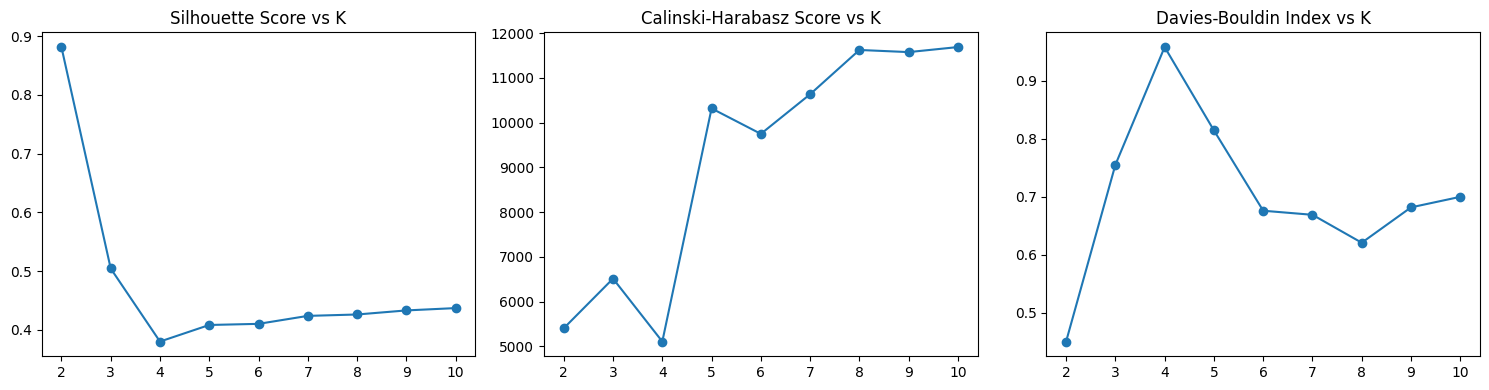

In [25]:
# A6
import matplotlib.pyplot as plt

silhouettes = []
chs = []
dbs = []

k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_scaled)
    labels = km.labels_
    silhouettes.append(silhouette_score(X_scaled, labels))
    chs.append(calinski_harabasz_score(X_scaled, labels))
    dbs.append(davies_bouldin_score(X_scaled, labels))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouettes, marker='o')
plt.title('Silhouette Score vs K')

plt.subplot(1, 3, 2)
plt.plot(k_values, chs, marker='o')
plt.title('Calinski-Harabasz Score vs K')

plt.subplot(1, 3, 3)
plt.plot(k_values, dbs, marker='o')
plt.title('Davies-Bouldin Index vs K')

plt.tight_layout()
plt.show()

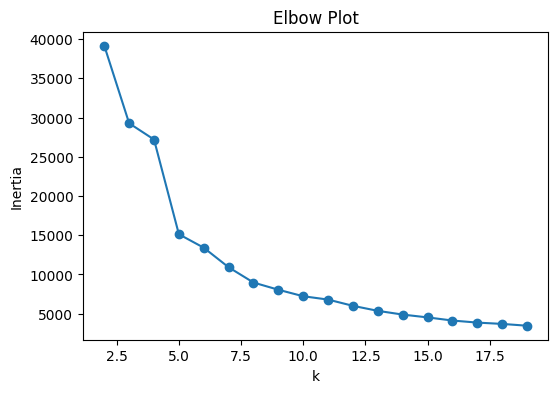

In [26]:
#A7
distortions = []
k_range = range(2, 20)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    distortions.append(km.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()